## 信用卡欺诈检测

基于信用卡交易记录数据建立分类模型来预测哪些交易记录是异常的哪些是正常的。

### 任务流程：
* 加载数据，观察问题（判断是否有缺失值，异常值，看不懂，不好用的数据）
* 针对问题给出解决方案
* 数据集切分
* 评估方法对比
* 逻辑回归模型
* 建模结果分析
* 方案效果对比

### 主要解决问题：
（1）在此项目中，我们首选对数据进行了观察，发现了其中样本不均衡的问题，其实我们做任务工作之前都一定要先进行数据检查，看看数据有什么问题，针对这些问题来选择解决方案。

（2）这里我们提出了两种方法，下采样和过采样，两条路线来进行对比实验，任何实际问题来了之后，我们都不会一条路走到黑的，没有对比就没有伤害，通常都会得到一个基础模型，然后对各种方法进行对比，找到最合适的，所以在任务开始之前，一定得多动脑筋多一手准备，得到的结果才有可选择的余地。

（3）在建模之前，需要对数据进行各种预处理的操作，比如数据标准化，缺失值填充等，这些都是必要操作，由于数据本身已经给定了特征，此处我们还没有提到特征工程这个概念，后续实战中我们会逐步引入，其实数据预处理的工作是整个任务中最为最重也是最苦的一个阶段，数据处理的好不好对结果的影响是最大的。

（4）先选好评估方法，再进行建模。建模的目的就是为了得到结果，但是我们不可能一次就得到最好的结果，肯定要尝试很多次，所以一定得有一个合适的评估方法，可以用这些通用的，比如Recall，准确率等，也可以根据实际问题自己指定评估指标。

（5）选择合适的算法，这里我们使用的是逻辑回归，也详细分析了其中的细节，这是因为我们刚刚讲解完逻辑回归的原理就拿它来练手了，之后我们还会讲解其他算法，并不一定非要用逻辑回归来完成这个任务，其他算法可能效果会更好。但是有一点我希望大家能够理解就是在机器学习中并不是越复杂的算法越实用，恰恰相反，越简单的算法反而应用的越广泛。逻辑回归就是其中一个典型的代表了，简单实用，所以任何分类问题都可以把逻辑回归当做一个待比较的基础模型了。

（6）模型的调参也是很重要的，之前我们通过实验也发现了不同的参数可能会对结果产生较大的影响，这一步也是必须的，后续实战内容我们还会来强调调参的细节，这里就简单概述一下了。对于参数我建立大家在使用工具包的时候先看看其API文档，知道每一个参数的意义，再来实验选择合适的参数值。

（7）得到的结果一定要和实际任务结合在一起，有时候虽然得到的结果指标还不错，但是实际应用却成了问题，所以测试环节也是必不可少的。到此，这个项目就给大家介绍到这里了，在实践中学习才能成长的更快，建议大家一定使用提供的Notebook代码文件来自己完成一遍上述操作。

导入我们的工具包

In [1]:
import pandas as pd#做数据处理、分析
import matplotlib.pyplot as plt#可视化展示
import numpy as np#矩阵计算
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
#把图镶嵌到notebook中,%matplotlib inline 是网页版工具中特定的命令
#导入工具包

数据读取

In [2]:
data = pd.read_csv("creditcard.csv")#指定当前特定的数据，并命名
#数据除了最后2个均已进行脱敏，Amount表示交易的金额，Class表示当前数据正常与否
#可拿来做分类任务，判断哪些交易金额正常，哪些不正常
data.head()#当前数据当中的前5条
#关注几个点：
#1. 数据类型：数值类型（若是中文数据，则还需转换为字符）
#2. 取值范围（大小和正负号）
#3. V1～V28是特征(可视为x)，但Class是标签（可视为y），两者之间y更重要，所以要先观察y
#（接上）：这组数据中观察y即观察Class中0和1的分布情况即可。

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


数据标签分布

In [3]:
pd.value_counts(data['Class'], sort = True).sort_index()

Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

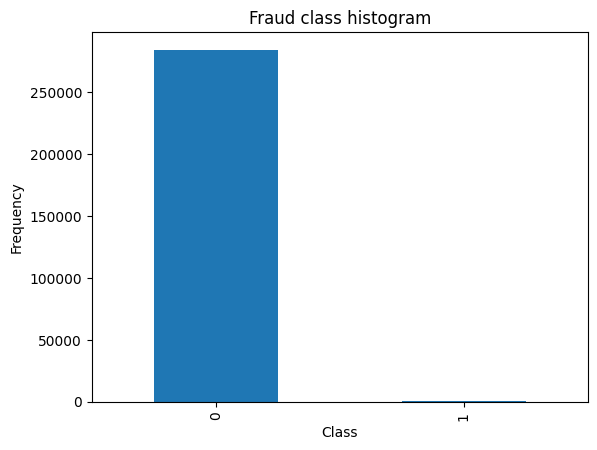

In [4]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()#计算Class中0和1的个数
#data['Class']表示取到这一列
count_classes.plot(kind = 'bar')
#连续值可用折线图，2个分类值可用条形图（(kind = 'bar')）
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

数据标准化处理

In [5]:
from sklearn.preprocessing import StandardScaler#使用sklearn的预处理，进行数据标准化

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
#StandardScaler()表示拿到标准化的数据
#fit_transform(data['Amount'].values.reshape(-1, 1))表示进行转换，fit表示算出均值和标准差的值
#transform表示利用标准差和均值进行标准化
#data['Amount']表示调取Amount这一列，values表示转换为array数据
#reshape(-1, 1)表示将数据转换为2维
#data['normAmount'] 表示添加新的一列并命名为normAmount
data = data.drop(['Time','Amount'],axis=1)#删除'Time','Amount'2列
data.head()#得到全新结果

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


下采样方案

In [6]:
data[data.Class == 1].index

Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,   6338,
         6427,
       ...
       274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149, 281144,
       281674],
      dtype='int64', length=492)

In [7]:
###从28w数据中取500个数据
X = data.iloc[:, data.columns != 'Class']
#X表示特征，除了标签外都称为特征
#:,表示取全部样本
#data.columns != 'Class'表示取特征，特征中不等于Class一列的都当作特征
y = data.iloc[:, data.columns == 'Class']
#Y表示取标签，取Class那一列作为标签

# 得到所有异常样本的索引（Class == 1为异常数据）
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)#拿到异常样本的index值

# 得到所有正常样本的索引
normal_indices = data[data.Class == 0].index

# 在正常样本中随机采样出指定个数的样本，并取其索引
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
#np.random（随机模块）.choice（在随机模块中选择）
#normal_indices,正常索引
#number_records_fraud,异常样本的个数
#replace = False替换操作
#random_normal_indices = np.array(random_normal_indices)将索引转换为np.array结构

# 有了正常和异常样本后把它们的索引都拿到手
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])#正常和异常样本拼在一起

# 根据索引得到下采样所有样本点（做好下采样的数据集）
under_sample_data = data.iloc[under_sample_indices,:]
#data.iloc通过索引定位数据
#:表示取所有特征

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# 下采样 样本比例（打印操作）
print("正常样本所占整体比例: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("异常样本所占整体比例: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("下采样策略总体样本数量: ", len(under_sample_data))

正常样本所占整体比例:  0.5
异常样本所占整体比例:  0.5
下采样策略总体样本数量:  984


数据集划分

In [8]:
from sklearn.model_selection import train_test_split#随机切分

        
        
# 整个数据集进行划分（训练集和测试集的切分）
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
#X表示数据（28万个样本），y表示标签
#test_size = 0.3表示测试集占整体的30%
#random_state = 0设定随机种子，保证每次随机的结果不变，每次切分都在相同的位置切分

print("原始训练集包含样本数量: ", len(X_train))
print("原始测试集包含样本数量: ", len(X_test))
print("原始样本总数: ", len(X_train)+len(X_test))

# 下采样数据集进行划分（后续用下采样数据进行建模）
#用下采样数据进行训练，原始数据的测试集进行测试（这样更准确公平）
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("下采样训练集包含样本数量: ", len(X_train_undersample))
print("下采样测试集包含样本数量: ", len(X_test_undersample))
print("下采样样本总数: ", len(X_train_undersample)+len(X_test_undersample))

原始训练集包含样本数量:  199364
原始测试集包含样本数量:  85443
原始样本总数:  284807

下采样训练集包含样本数量:  688
下采样测试集包含样本数量:  296
下采样样本总数:  984


逻辑回归模型

In [9]:
#Recall = TP/(TP+FN)#Recall表示召回率，TP(true positives正类判定为正类的个数），FN（false positive）,负类判定为正类的个数
#补充：NR(false negatives)表示正类判定为负类（假值），TN(true negatives)表示负类判定为负类（真值）
#此处的TP表示把异常样本当作异常样本，FP表示把正常样本当作异常样本
from sklearn.linear_model import LogisticRegression#导入逻辑回归模型
from sklearn.model_selection import KFold, cross_val_score#导入K折（把训练集划分为K份）的交叉验证
from sklearn.metrics import confusion_matrix,recall_score,classification_report #计算指标（混淆矩阵，召回率，分类报告：包含召回率，准确率，F1值等指标）
from sklearn.model_selection import cross_val_predict#交叉验证预测

In [10]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 
    #传入参数：len(y_train_data)表示样本个数；5表示把样本平均分为5份；shuffle=False表示不洗牌

    # 定义不同力度的正则化惩罚力度（检查不同参数对结果的影响，以选择最好的参数），不同惩罚力度对结果产生的影响
    c_param_range = [0.01,0.1,1,10,100]#在这里是反转惩罚力度（默认），0.01表示的是1/0.01，相当于一个很大的惩罚力度
    # 展示结果用的表格
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # k-fold 表示K折的交叉验证，这里会得到两个索引集合: 训练集 = indices[0], 验证集 = indices[1]
    j = 0
    #循环遍历不同的参数，选参数来建模
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('正则化惩罚力度: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        
        #一步步分解来执行交叉验证
        #indices表示用0表示训练集，用1表示验证集
        for iteration, indices in enumerate(fold.split(x_train_data)): 

            # 指定算法模型，并且给定参数，在训练集上做训练
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear')
# 修改求解器为liblinear，支持l1惩罚项
            # 训练模型（.fit），注意不要给错了，训练的时候一定传入的是训练集，所以X和Y的索引都是0
            #索引（x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:]）
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # 建立好模型后，预测模型结果，这里用的就是验证集，索引为1
            #lr.表示训练完的结果
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # 有了预测结果之后就可以来进行评估了，这里recall_score需要传入预测值（y_pred_undersample）和真实值（y_train_data.）。
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            # 一会还要算平均，所以把每一步的结果都先保存起来。
            recall_accs.append(recall_acc)#把所有结果加在一起
            print('Iteration ', iteration,': 召回率 = ', recall_acc)

        # 当执行完所有的交叉验证后，计算平均结果
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')
        
    #找到最好的参数，哪一个Recall高，自然就是最好的了。
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    
    # 打印最好的结果
    print('*********************************************************************************')
    print('效果最好的模型所选参数 = ', best_c)
    print('*********************************************************************************')
    
    return best_c

交叉验证(是训练集的事，不涉及测试集)与不同参数结果

In [11]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)
#printing_Kfold_scores是一个函数
#(X_train_undersample,y_train_undersample)表示传入下采样训练集当中的特征和标签
#结果当中主要看相同的惩罚力度下对交叉验证的影响
#参数平均召回率高的说明参数好

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.9452054794520548
Iteration  1 : 召回率 =  0.9315068493150684
Iteration  2 : 召回率 =  1.0
Iteration  3 : 召回率 =  0.9594594594594594
Iteration  4 : 召回率 =  0.9696969696969697

平均召回率  0.9611737515847105

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.8493150684931506
Iteration  1 : 召回率 =  0.863013698630137
Iteration  2 : 召回率 =  0.9661016949152542
Iteration  3 : 召回率 =  0.9459459459459459
Iteration  4 : 召回率 =  0.9090909090909091

平均召回率  0.9066934634150794

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.863013698630137
Iteration  1 : 召回率 =  0.8767123287671232
Iteration  2 : 召回率 =  0.9830508474576272
Iteration  3 : 召回率 =  0.9459459459459459
Iteration  4 : 召回率 =  0.9090909090909091

平均召回率  0.9155627459783485

----------

混淆矩阵（摸板，用的时候直接复制）
（混淆矩阵（Confusion Matrix）是机器学习中用于评估分类模型性能的一种常用工具，它以表格形式直观地展示模型预测结果与真实标签之间的对比情况。特别适用于二分类问题，也可扩展到多分类场景。）

In [12]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    绘制混淆矩阵
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

召回率:  0.9251700680272109


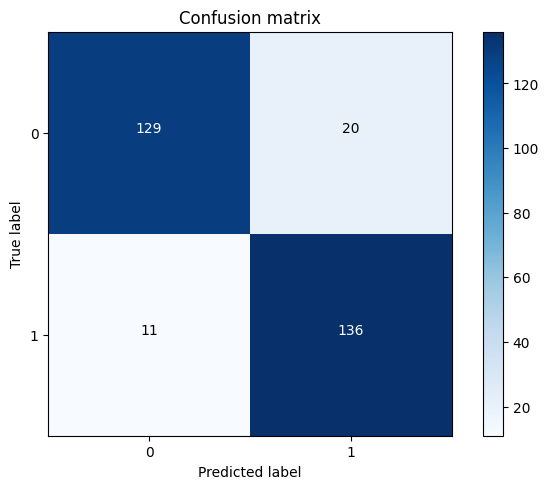

In [13]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
#选择最好的参数
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
#用最好的参数重新训练模型
y_pred_undersample = lr.predict(X_test_undersample.values)#预测测试集上的结果
#这里使用的是下采样的数据

# 计算所需值
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)#将测试值和真实值传入混淆矩阵
np.set_printoptions(precision=2)#精确

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
#1表示异常，0表示正常，下方图表中（0，1）区域表示预测为正常的标签本身异常（漏检），只有（1，1）和（0，0）是预测对的

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()#展示的是下采样数据条件下的结果

下采样方案在原始数据集中的结果

召回率:  0.9251700680272109


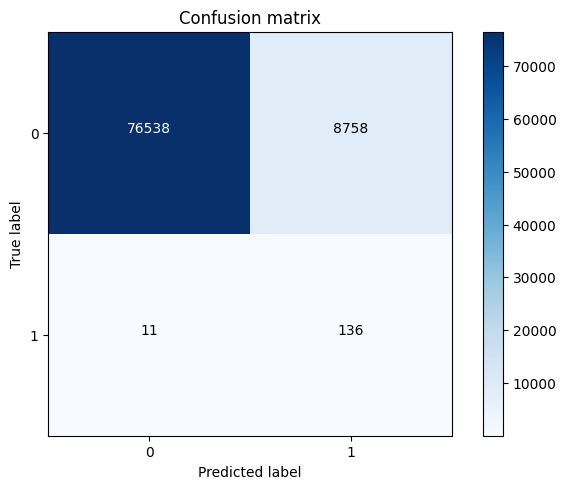

In [14]:
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
#选择最好的那组参数
lr.fit(X_train_undersample,y_train_undersample.values.ravel())#用最好的参数重新训练模型
y_pred = lr.predict(X_test.values)
#这里使用的是原始数据，而非下采样数据

# 计算所需值
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()#展示的是原始数据条件下的结果

阈值对结果的影响（阈值对建模没有影响，只影响建模完成后对结果的预测）

给定阈值为: 0.1 时测试集召回率:  1.0
给定阈值为: 0.2 时测试集召回率:  1.0
给定阈值为: 0.3 时测试集召回率:  1.0
给定阈值为: 0.4 时测试集召回率:  0.9931972789115646
给定阈值为: 0.5 时测试集召回率:  0.9251700680272109
给定阈值为: 0.6 时测试集召回率:  0.8843537414965986
给定阈值为: 0.7 时测试集召回率:  0.8435374149659864
给定阈值为: 0.8 时测试集召回率:  0.7551020408163265
给定阈值为: 0.9 时测试集召回率:  0.5986394557823129


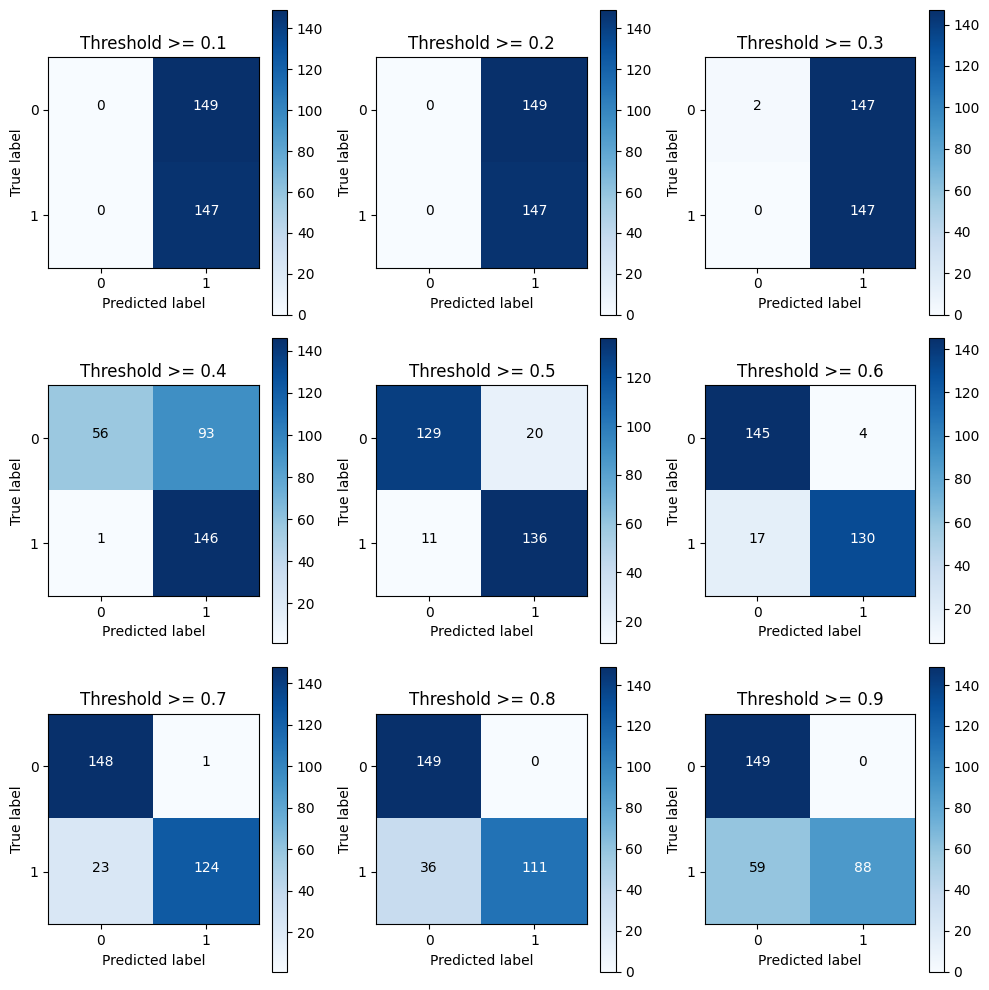

In [15]:
# 用之前最好的参数来进行建模
lr = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
#LogisticRegression()表示导入回归模型
#C = 0.01表示正则化强度的倒数

# 训练模型，还是用下采样的数据集
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
#LogisticRegression.fit() 方法要求输入的标签数据 y 必须是 一维数组（形状为 (n_samples,)）。如果直接传入 Pandas 的 Series 或 DataFrame 对象，可能会引发维度不匹配的错误。
#values：将 Pandas 的 Series 或 DataFrame 转换为 NumPy 的 ndarray。
#ravel()：将多维数组展平为一维数组（等价于 flatten()，但返回视图而非副本，更高效）

# 得到预测结果的概率值（lr.predict_proba()）（先得到概率值，后面再自己设置阈值进行判断）
#若直接lr.predict()则得到的是以0.5为阈值的结果
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

#指定不同的阈值（以下仅为🪨，具体做的时候尽量选择偏中间的阈值）
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1

# 用混淆矩阵来进行展示（画图展示）：遍历不同阈值，观察它们对模型预测结果（尤其是召回率）的影响，并可视化对应的混淆矩阵。
for i in thresholds:#（遍历操作）
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i#用当前阈值生成预测结果：概率 > 阈值 则为正类（异常值）
    
    plt.subplot(3,3,j)#画出3行3列的子图（9个，因为设定了9个阈值），j表示第几个子图
    j += 1## 子图索引递增

#计算混淆矩阵并打印召回率
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2) # 设置浮点数精度

    print("给定阈值为:",i,"时测试集召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
#cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])表示召回率的定义

    # 可视化混淆矩阵
    class_names = [0,1] # 类别标签
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [16]:
print(cnf_matrix[1,1])

88


### SMOTE过采样方案

In [17]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [18]:
credit_cards=pd.read_csv('creditcard.csv')#使用 pandas 的read_csv函数读取名为creditcard.csv的文件，将数据加载到一个 DataFrame 中，方便后续的分析与处理。

columns=credit_cards.columns#获取 DataFrame 各列的列名，将其存储在变量columns里，这样就能知晓数据包含哪些特征和标签。
# 在特征中去除掉标签
features_columns=columns.delete(len(columns)-1)#目的：从所有列名中删除最后一列的列名。一般而言，最后一列是标签列（像这里的Class），删除后得到的就是特征列的列名。

features=credit_cards[features_columns]#依据前面得到的特征列列名，从 DataFrame 中选取对应的列，把这些特征数据存于features变量中。
labels=credit_cards['Class']#从 DataFrame 中提取出标签列Class的数据，将其存于labels变量中，为后续的监督学习任务（如分类）做好准备

In [19]:
#切分数据集
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.3, 
                                                                            random_state=0)
#test_size=0.3表示指定测试集占原始数据集的比例。这里设置为 0.3，表示测试集占 30%，训练集占 70%。
#random_state=0表示设置随机数种子，确保每次划分的结果相同。这对于实验的可重复性很重要，即相同的代码在不同时间运行时，得到的训练集和测试集是一样的。

基于SMOTE算法来进行样本生成，这样正例和负例样本数量就是一致的了

In [20]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_resample(features_train,labels_train)
#features_train相当于x,labels_train相当于y
#fit_sample()：先拟合 SMOTE 模型（分析少数类样本的分布特征），然后生成新的少数类样本。
#返回值：
#os_features：过采样后的特征数据（包含原始特征和合成特征）。
#os_labels：过采样后的标签数据（类别分布更平衡）。

训练集样本数量

In [21]:
len(os_labels[os_labels==1])#得到标签为1（异常）数据的总数量（目前和标签为0的数据量一样多）

199019

In [22]:
os_features = pd.DataFrame(os_features)#把过采样得到的特征数组os_features转换为 Pandas 的 DataFrame 格式。
os_labels = pd.DataFrame(os_labels)#将过采样得到的标签数组os_labels转换为 Pandas 的 DataFrame 格式。
best_c = printing_Kfold_scores(os_features,os_labels)#调用printing_Kfold_scores函数，通过交叉验证的方式在过采样数据集上对模型参数进行调优，进而得到最优参数best_c。

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.9142857142857143
Iteration  1 : 召回率 =  0.88
Iteration  2 : 召回率 =  0.9716995447647951
Iteration  3 : 召回率 =  0.962113884457397
Iteration  4 : 召回率 =  0.9618375268506538

平均召回率  0.9379873340717122

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.9142857142857143
Iteration  1 : 召回率 =  0.88
Iteration  2 : 召回率 =  0.9730146686899342
Iteration  3 : 召回率 =  0.9641488813797782
Iteration  4 : 召回率 =  0.9639353323200222

平均召回率  0.9390769193350899

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.9142857142857143
Iteration  1 : 召回率 =  0.88
Iteration  2 : 召回率 =  0.9730399595346485
Iteration  3 : 召回率 =  0.9643624304395342
Iteration  4 : 召回率 =  0.9640107025764066

平均召回率  0.9391397613672607

------------------------------------

召回率:  0.891156462585034


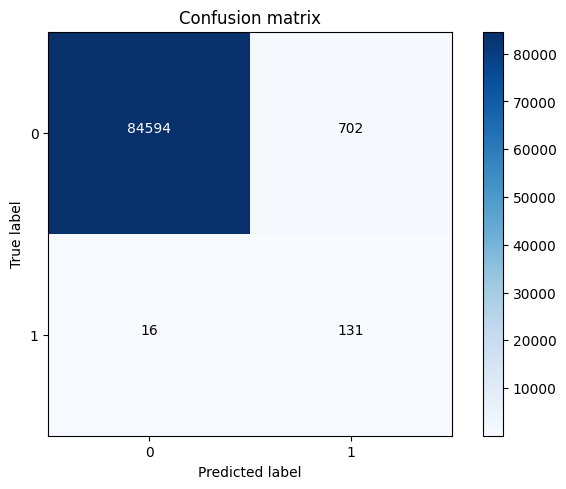

In [27]:
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)
#测试集中计算

# 计算混淆矩阵（测试集）
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### 项目总结

（1）在此项目中，我们首选对数据进行了观察，发现了其中样本不均衡的问题，其实我们做任务工作之前都一定要先进行数据检查，看看数据有什么问题，针对这些问题来选择解决方案。

（2）这里我们提出了两种方法，下采样和过采样，两条路线来进行对比实验，任何实际问题来了之后，我们都不会一条路走到黑的，没有对比就没有伤害，通常都会得到一个基础模型，然后对各种方法进行对比，找到最合适的，所以在任务开始之前，一定得多动脑筋多一手准备，得到的结果才有可选择的余地。

（3）在建模之前，需要对数据进行各种预处理的操作，比如数据标准化，缺失值填充等，这些都是必要操作，由于数据本身已经给定了特征，此处我们还没有提到特征工程这个概念，后续实战中我们会逐步引入，其实数据预处理的工作是整个任务中最为最重也是最苦的一个阶段，数据处理的好不好对结果的影响是最大的。

（4）先选好评估方法，再进行建模。建模的目的就是为了得到结果，但是我们不可能一次就得到最好的结果，肯定要尝试很多次，所以一定得有一个合适的评估方法，可以用这些通用的，比如Recall，准确率等，也可以根据实际问题自己指定评估指标。

（5）选择合适的算法，这里我们使用的是逻辑回归，也详细分析了其中的细节，这是因为我们刚刚讲解完逻辑回归的原理就拿它来练手了，之后我们还会讲解其他算法，并不一定非要用逻辑回归来完成这个任务，其他算法可能效果会更好。但是有一点我希望大家能够理解就是在机器学习中并不是越复杂的算法越实用，恰恰相反，越简单的算法反而应用的越广泛。逻辑回归就是其中一个典型的代表了，简单实用，所以任何分类问题都可以把逻辑回归当做一个待比较的基础模型了。

（6）模型的调参也是很重要的，之前我们通过实验也发现了不同的参数可能会对结果产生较大的影响，这一步也是必须的，后续实战内容我们还会来强调调参的细节，这里就简单概述一下了。对于参数我建立大家在使用工具包的时候先看看其API文档，知道每一个参数的意义，再来实验选择合适的参数值。

（7）得到的结果一定要和实际任务结合在一起，有时候虽然得到的结果指标还不错，但是实际应用却成了问题，所以测试环节也是必不可少的。到此，这个项目就给大家介绍到这里了，在实践中学习才能成长的更快，建议大家一定使用提供的Notebook代码文件来自己完成一遍上述操作。